In [1]:
import re
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
mpl.rcParams['figure.figsize'] = [16,9]
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.duplicated().sum()

0

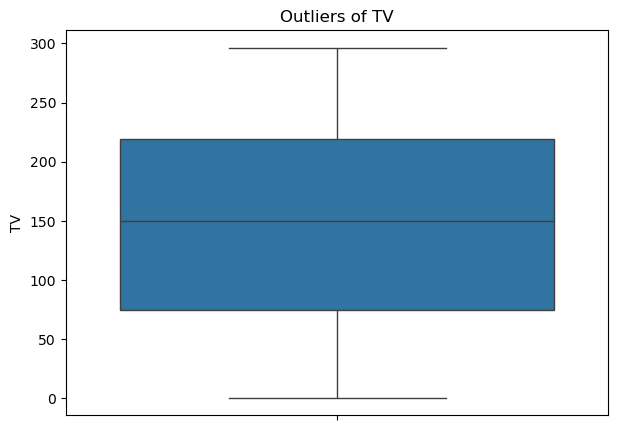

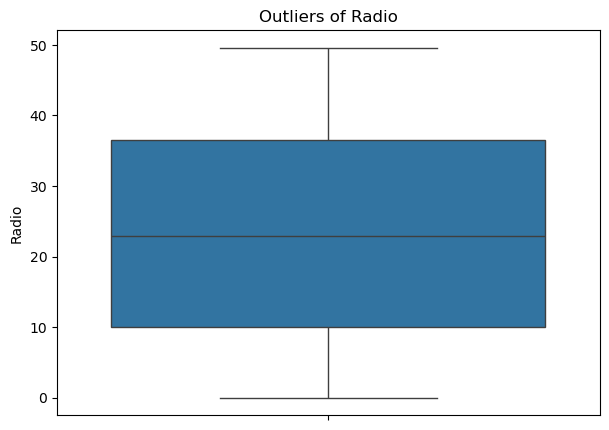

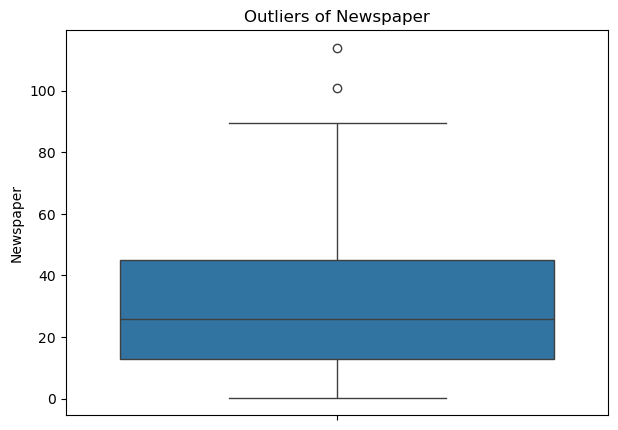

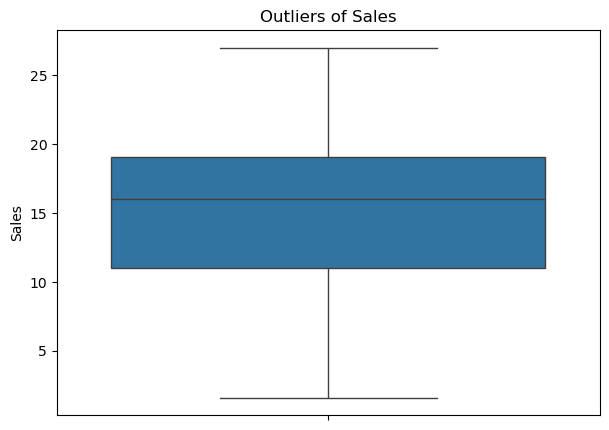

In [27]:
for col in df.columns:
    plt.figure(figsize=(7,5))
    plt.title(f'Outliers of {col}')
    sns.boxplot(data=df, y=col)
    plt.show()

In [43]:
q1 = np.percentile(df['Newspaper'],25)
q3 = np.percentile(df['Newspaper'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
up = q3 + 1.5*iqr
outliers = df[(df['Newspaper'] < low) | (df['Newspaper'] > up)]
outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


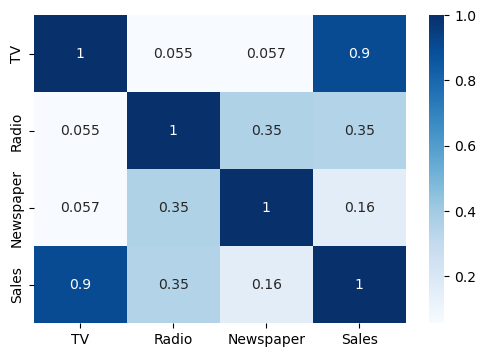

In [123]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [81]:
y = df['Sales']
x = df.drop('Sales',axis=1)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
min_max_scaler = MinMaxScaler()

In [85]:
scaled_x_train = min_max_scaler.fit_transform(x_train)
scaled_x_test = min_max_scaler.fit_transform(x_test)

In [87]:
lin = LinearRegression()
lin.fit(scaled_x_train, y_train)

LinearRegression()

In [89]:
prediction = lin.predict(scaled_x_test)

In [91]:
r2_score(prediction, y_test)

0.9048555131198426

In [99]:
result = pd.DataFrame(zip(y_test, prediction), columns=['y_test', 'prediction']).map(float)
result

,y_test,prediction
0,16.9,16.949067
1,22.4,20.435141
2,21.4,23.831877
3,7.3,8.975224
4,24.7,21.775594
5,12.6,12.359592
6,22.3,21.137739
7,8.4,8.369007
8,16.5,17.155069
9,16.1,16.574880


In [101]:
mean_absolute_error(prediction, y_test)

1.268853675546811

In [103]:
mean_squared_error(prediction, y_test)

2.815621208080926

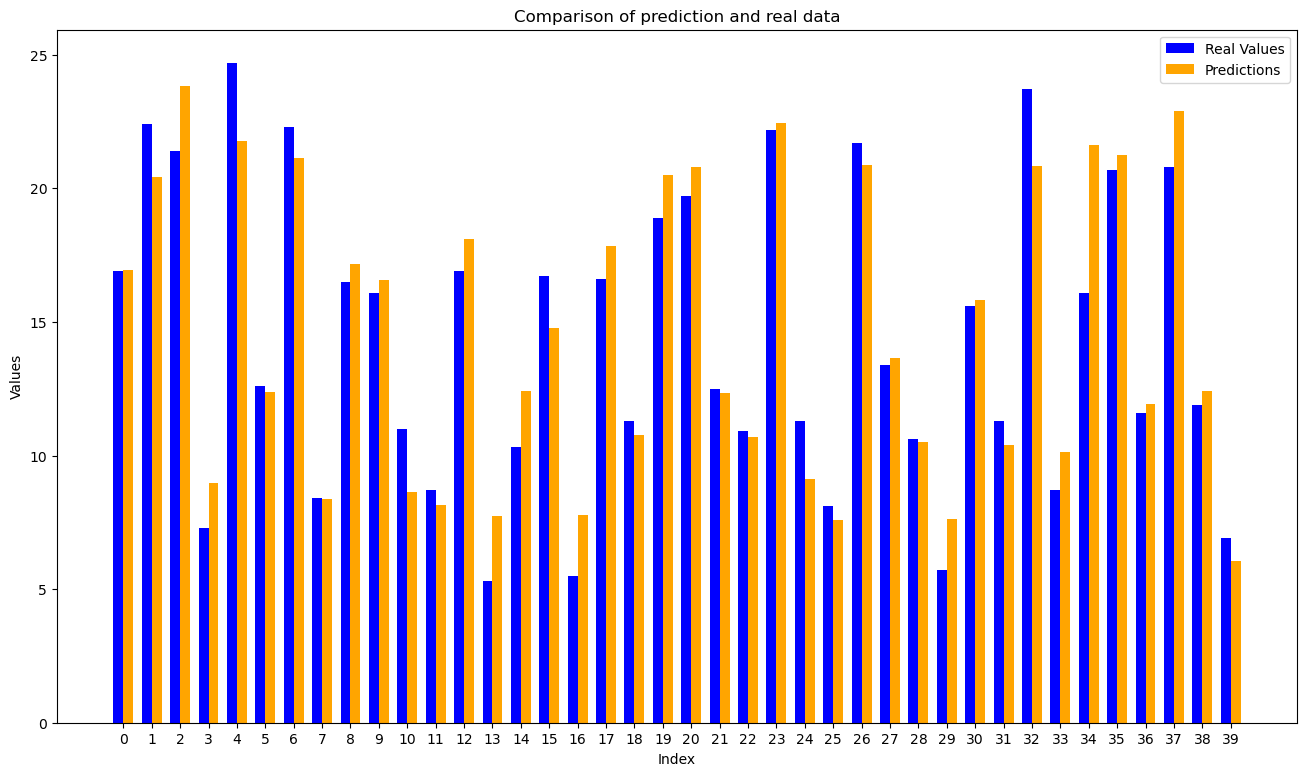

In [109]:
indices = np.arange(len(y_test.to_numpy()))
width = 0.35
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(indices - width/2, y_test.to_numpy(), width, label='Real Values', color='blue')
ax.bar(indices + width/2, prediction, width, label='Predictions', color='orange')
ax.set_xlabel("Index")
ax.set_ylabel("Values")
ax.set_title("Comparison of prediction and real data")
ax.set_xticks(indices)
ax.legend()
plt.show()

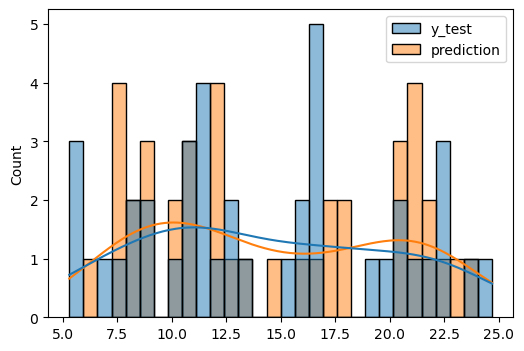

In [115]:
plt.figure(figsize=(6,4))
sns.histplot(data=result,kde=True,bins=30)
plt.show()

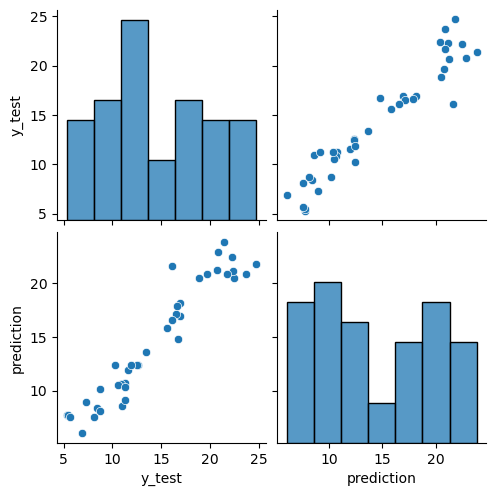

In [119]:
sns.pairplot(data=result)
plt.show()

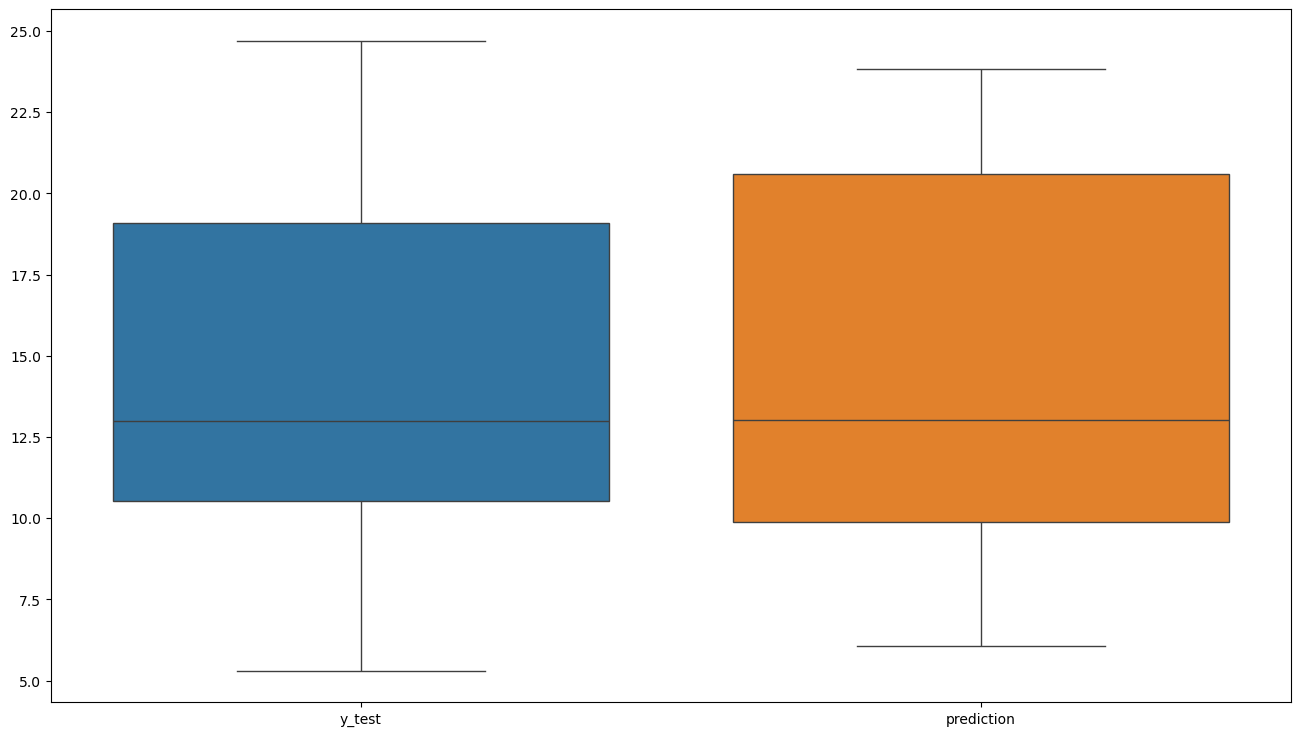

In [121]:
plt.figure(figsize=(16,9))
sns.boxplot(data=result)
plt.show()